In [1]:
#Imports

import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

path = "D:/DataScience_Project/European_Soccer_Analysis/database_sqlite/"
database = path + "database.sqlite"

In [2]:
# Create a connection to check what are the tables in the database

conn = sqlite3.connect(database)

tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type = 'table';""",conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


In [3]:
#List of countries

countries = pd.read_sql("SELECT * FROM Country;",conn)
countries

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [4]:
#List of leagues and their countries

leagues = pd.read_sql("""SELECT * FROM League
                         INNER JOIN Country ON Country.id = League.country_id;""",conn)
leagues

,id,country_id,name,id,name
0,1,1,Belgium Jupiler League,1,Belgium
1,1729,1729,England Premier League,1729,England
2,4769,4769,France Ligue 1,4769,France
3,7809,7809,Germany 1. Bundesliga,7809,Germany
4,10257,10257,Italy Serie A,10257,Italy
5,13274,13274,Netherlands Eredivisie,13274,Netherlands
6,15722,15722,Poland Ekstraklasa,15722,Poland
7,17642,17642,Portugal Liga ZON Sagres,17642,Portugal
8,19694,19694,Scotland Premier League,19694,Scotland
9,21518,21518,Spain LIGA BBVA,21518,Spain


In [5]:
# List of teams
teams = pd.read_sql("SELECT * FROM Team ORDER BY team_long_name;",conn)
teams.head(10)

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,16848,8350,29.0,1. FC Kaiserslautern,KAI
1,15624,8722,31.0,1. FC Köln,FCK
2,16239,8165,171.0,1. FC Nürnberg,NUR
3,16243,9905,169.0,1. FSV Mainz 05,MAI
4,11817,8576,614.0,AC Ajaccio,AJA
5,11074,108893,111989.0,AC Arles-Avignon,ARL
6,49116,6493,1714.0,AC Bellinzona,BEL
7,26560,10217,650.0,ADO Den Haag,HAA
8,9537,8583,57.0,AJ Auxerre,AUX
9,9547,9829,69.0,AS Monaco,MON


In [6]:
# List of Matches

detailed_matches_all = pd.read_sql("""SELECT M.id,
                               C.name as Country_Name,
                               L.name as League_Name,
                               M.season,
                               M.stage,
                               M.date,
                               HT.team_long_name as Home_Team_Name,
                               AT.team_long_name as Away_Team_Name,
                               M.home_team_goal,
                               M.away_team_goal
                               FROM Match M
                               INNER JOIN Country C on C.id = M.country_id
                               INNER JOIN League L on L.id = M.country_id
                               LEFT JOIN Team HT on HT.team_api_id = M.home_team_api_id
                               LEFT JOIN Team AT on AT.team_api_id = M.away_team_api_id;""",conn)
detailed_matches_all.head(10)

,id,Country_Name,League_Name,season,stage,date,Home_Team_Name,Away_Team_Name,home_team_goal,away_team_goal
0,1,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-17 00:00:00,KRC Genk,Beerschot AC,1,1
1,2,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,SV Zulte-Waregem,Sporting Lokeren,0,0
2,3,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,KSV Cercle Brugge,RSC Anderlecht,0,3
3,4,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-17 00:00:00,KAA Gent,RAEC Mons,5,0
4,5,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,FCV Dender EH,Standard de Liège,1,3
5,6,Belgium,Belgium Jupiler League,2008/2009,1,2008-09-24 00:00:00,KV Mechelen,Club Brugge KV,1,1
6,7,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,KSV Roeselare,KV Kortrijk,2,2
7,8,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,Tubize,Royal Excel Mouscron,1,2
8,9,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,KVC Westerlo,Sporting Charleroi,1,0
9,10,Belgium,Belgium Jupiler League,2008/2009,10,2008-11-01 00:00:00,Club Brugge KV,KV Kortrijk,4,1


In [7]:
detailed_matches_spain = pd.read_sql("""SELECT M.id,
                               C.name as Country_Name,
                               L.name as League_Name,
                               M.season,
                               M.stage,
                               M.date,
                               HT.team_long_name as Home_Team_Name,
                               AT.team_long_name as Away_Team_Name,
                               M.home_team_goal,
                               M.away_team_goal
                               FROM Match M
                               INNER JOIN Country C on C.id = M.country_id
                               INNER JOIN League L on L.id = M.league_id
                               LEFT JOIN Team HT on HT.team_api_id = M.home_team_api_id
                               LEFT JOIN Team AT on AT.team_api_id = M.away_team_api_id
                               WHERE C.name = 'Spain'
                               ORDER BY M.date;""",conn)
detailed_matches_spain.head(10)

,id,Country_Name,League_Name,season,stage,date,Home_Team_Name,Away_Team_Name,home_team_goal,away_team_goal
0,21518,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-30 00:00:00,Valencia CF,RCD Mallorca,3,0
1,21525,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-30 00:00:00,RCD Espanyol,Real Valladolid,1,0
2,21519,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,CA Osasuna,Villarreal CF,1,1
3,21520,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,RC Deportivo de La Coruña,Real Madrid CF,2,1
4,21521,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,CD Numancia,FC Barcelona,1,0
5,21522,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Racing Santander,Sevilla FC,1,1
6,21523,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Real Sporting de Gijón,Getafe CF,1,2
7,21524,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Real Betis Balompié,RC Recreativo,0,1
8,21526,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Athletic Club de Bilbao,UD Almería,1,3
9,21527,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Atlético Madrid,Málaga CF,4,0


In [8]:
#Analysis of leagues by season, getting avg goals, total scores, bifurcating home matches and away matches

leagues_by_seasons = pd.read_sql("""SELECT C.name as Country_Name,
                                    L.name as League_Name,
                                    M.season,
                                    COUNT(DISTINCT M.stage) as No_of_Stages,
                                    COUNT(DISTINCT HT.team_long_name) AS No_of_Teams,
                                    AVG(M.home_team_goal) AS Avg_home_team_score,
                                    AVG(M.away_team_goal) AS Avg_away_team_score,
                                    AVG(M.home_team_goal-M.away_team_goal) AS Avg_goal_diff,
                                    AVG(M.home_team_goal+M.away_team_goal) AS Avg_Score,
                                    SUM(M.home_team_goal+M.away_team_goal) AS Total_Score
                                    FROM Match M
                                    INNER JOIN Country C on C.id = M.country_id
                                    INNER JOIN League L on L.id = M.league_id
                                    LEFT JOIN Team HT on HT.team_api_id = M.home_team_api_id
                                    LEFT JOIN Team AT on AT.team_api_id = M.away_team_api_id
                                    WHERE Country_Name in ('Spain', 'Germany', 'France', 'Italy', 'England')
                                    GROUP BY C.name, L.name, M.season
                                    HAVING count(distinct M.stage) > 10
                                    ORDER BY C.name, L.name, M.season DESC;""",conn)

leagues_by_seasons

,Country_Name,League_Name,season,No_of_Stages,No_of_Teams,Avg_home_team_score,Avg_away_team_score,Avg_goal_diff,Avg_Score,Total_Score
0,England,England Premier League,2015/2016,38,20,1.492105,1.207895,0.284211,2.700000,1026
1,England,England Premier League,2014/2015,38,20,1.473684,1.092105,0.381579,2.565789,975
2,England,England Premier League,2013/2014,38,20,1.573684,1.194737,0.378947,2.768421,1052
3,England,England Premier League,2012/2013,38,20,1.557895,1.239474,0.318421,2.797368,1063
4,England,England Premier League,2011/2012,38,20,1.589474,1.215789,0.373684,2.805263,1066
5,England,England Premier League,2010/2011,38,20,1.623684,1.173684,0.450000,2.797368,1063
6,England,England Premier League,2009/2010,38,20,1.697368,1.073684,0.623684,2.771053,1053
7,England,England Premier League,2008/2009,38,20,1.400000,1.078947,0.321053,2.478947,942
8,France,France Ligue 1,2015/2016,38,20,1.436842,1.089474,0.347368,2.526316,960
9,France,France Ligue 1,2014/2015,38,20,1.410526,1.081579,0.328947,2.492105,947


C:\Users\Sonu-PC\AppData\Local\Temp\ipykernel_42424\2461685628.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,'Germany'] = list(leagues_by_seasons.loc[leagues_by_seasons['Country_Name']=='Germany','Avg_Score'])
C:\Users\Sonu-PC\AppData\Local\Temp\ipykernel_42424\2461685628.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,'Spain']   = list(leagues_by_seasons.loc[leagues_by_seasons['Country_Name']=='Spain','Avg_Score'])
C:\Users\Sonu-PC\AppData\Local\Temp\ipykernel_42424\2461685628.py:5: DeprecationWarning: In a futu

<Axes: title={'center': 'Average Goals per Game Over Time'}>

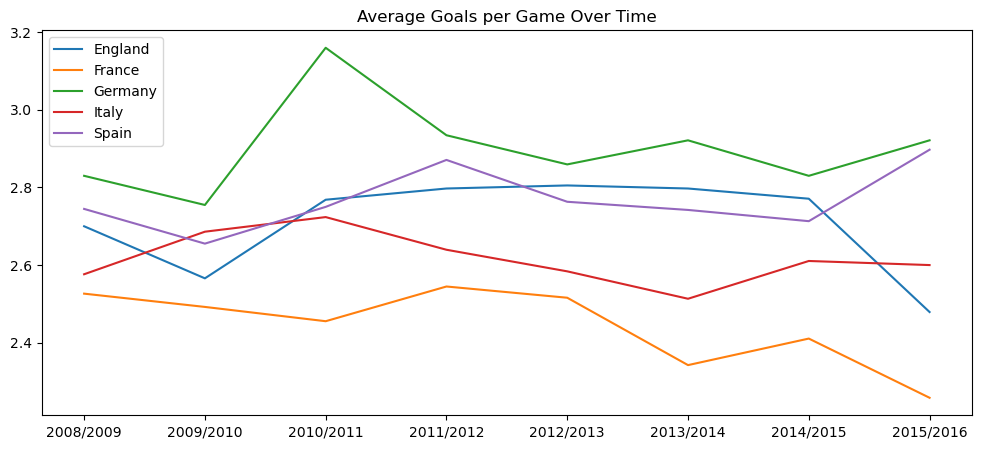

In [9]:
df = pd.DataFrame(index=np.sort(leagues_by_seasons['season'].unique()), columns=leagues_by_seasons['Country_Name'].unique())

df.loc[:,'Germany'] = list(leagues_by_seasons.loc[leagues_by_seasons['Country_Name']=='Germany','Avg_Score'])
df.loc[:,'Spain']   = list(leagues_by_seasons.loc[leagues_by_seasons['Country_Name']=='Spain','Avg_Score'])
df.loc[:,'France']   = list(leagues_by_seasons.loc[leagues_by_seasons['Country_Name']=='France','Avg_Score'])
df.loc[:,'Italy']   = list(leagues_by_seasons.loc[leagues_by_seasons['Country_Name']=='Italy','Avg_Score'])
df.loc[:,'England']   = list(leagues_by_seasons.loc[leagues_by_seasons['Country_Name']=='England','Avg_Score'])

df.plot(figsize=(12,5),title='Average Goals per Game Over Time')

C:\Users\Sonu-PC\AppData\Local\Temp\ipykernel_42424\1100344613.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,'Germany'] = list(leagues_by_seasons.loc[leagues_by_seasons['Country_Name']=='Germany','Avg_goal_diff'])
C:\Users\Sonu-PC\AppData\Local\Temp\ipykernel_42424\1100344613.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,'Spain']   = list(leagues_by_seasons.loc[leagues_by_seasons['Country_Name']=='Spain','Avg_goal_diff'])
C:\Users\Sonu-PC\AppData\Local\Temp\ipykernel_42424\1100344613.py:5: DeprecationWarning: I

<Axes: title={'center': 'Average Goals Difference Home vs Out'}>

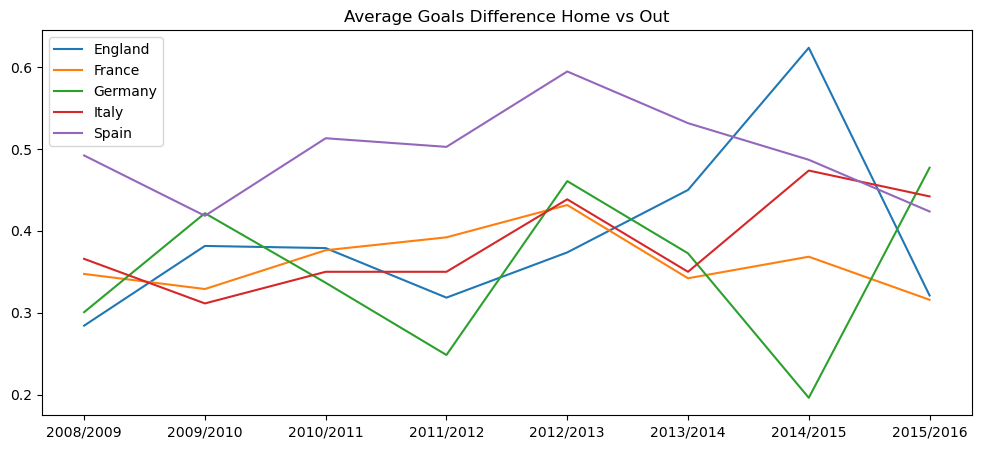

In [10]:
df = pd.DataFrame(index=np.sort(leagues_by_seasons['season'].unique()), columns=leagues_by_seasons['Country_Name'].unique())

df.loc[:,'Germany'] = list(leagues_by_seasons.loc[leagues_by_seasons['Country_Name']=='Germany','Avg_goal_diff'])
df.loc[:,'Spain']   = list(leagues_by_seasons.loc[leagues_by_seasons['Country_Name']=='Spain','Avg_goal_diff'])
df.loc[:,'France']   = list(leagues_by_seasons.loc[leagues_by_seasons['Country_Name']=='France','Avg_goal_diff'])
df.loc[:,'Italy']   = list(leagues_by_seasons.loc[leagues_by_seasons['Country_Name']=='Italy','Avg_goal_diff'])
df.loc[:,'England']   = list(leagues_by_seasons.loc[leagues_by_seasons['Country_Name']=='England','Avg_goal_diff'])

df.plot(figsize=(12,5),title='Average Goals Difference Home vs Out')

C:\Users\Sonu-PC\AppData\Local\Temp\ipykernel_42424\3151728116.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot_sns.set_xticklabels(plot_sns.get_xticklabels(),rotation=90)


<Axes: >

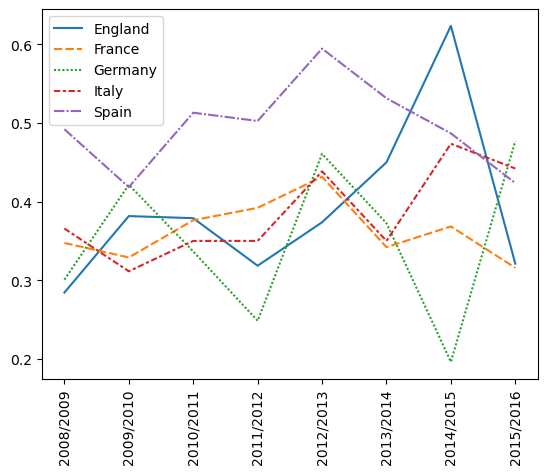

In [11]:
plot_sns = sns.lineplot(data=df)
plot_sns.set_xticklabels(plot_sns.get_xticklabels(),rotation=90)
plot_sns